In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import d2lzh_pytorch as d2l

In [25]:
data_path = 'data/kaggle_house/'
train_data_path = data_path + 'train.csv'
test_data_path = data_path + 'test.csv'
submission_data_path = data_path + 'submission.csv'
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [3]:
print(train_data.shape, test_data.shape)

(1460, 81) (1459, 80)


In [4]:
train_data.iloc[0:3, [0, 1, 2, 3, -3, -2, -1]]

,Id,MSSubClass,MSZoning,LotFrontage,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,WD,Normal,208500
1,2,20,RL,80.0,WD,Normal,181500
2,3,60,RL,68.0,WD,Normal,223500


In [5]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
all_features = pd.concat((train_data.iloc[:, 1:-1],
                        test_data.iloc[:, 1:]))

In [8]:
all_features.shape

(2919, 79)

In [9]:
# 连续特征标准化，缺失特征替换位该特征的均值
#（标准化后均值为0）
numeric_features = all_features.dtypes[
    all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[
    numeric_features].apply(lambda x: (x - x.mean())
                           / (x.std()))
all_features = all_features.fillna(0)

In [10]:
# 离散特征数值转成指示特征
all_features = pd.get_dummies(all_features, 
                              dummy_na=True)
print(all_features.shape)

(2919, 354)


In [11]:
n_train = train_data.shape[0]
train_features = torch.tensor(
    all_features[:n_train].values,
    dtype=torch.float
)
test_features = torch.tensor(
    all_features[n_train:].values,
    dtype=torch.float
)
train_labels = torch.tensor(
    train_data.SalePrice.values,
    dtype=torch.float).view(-1, 1)

In [12]:
print(train_features.shape, test_features.shape,
     train_labels.shape)

torch.Size([1460, 354]) torch.Size([1459, 354]) torch.Size([1460, 1])


In [13]:
# 定义模型
loss = torch.nn.MSELoss()
def get_net(feature_num):
    net = nn.Linear(feature_num, 1)
    for param in net.parameters():
        nn.init.normal_(param, mean=0, std=0.01)
    return net

In [14]:
# 对数均方根误差
def log_rmse(net, features, labels):
    with torch.no_grad():
        clipped_preds = torch.max(
            net(features),
            torch.tensor(1.0))
        rmse = torch.sqrt(2 * loss(
            clipped_preds.log(),
            labels.log()).mean())
        return rmse.item()

In [15]:
def train(net, train_features, train_labels,
         test_features, test_labels, num_epochs,
         learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    dataset = torch.utils.data.TensorDataset(
        train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(
        dataset, batch_size, shuffle=True)
    optimizer = torch.optim.Adam(
        params=net.parameters(),
        lr=learning_rate,
        weight_decay=weight_decay
    )
    net = net.float()
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X.float()), y.float())
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(
            net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(
                net, test_features, test_labels))
    return train_ls, test_ls

In [16]:
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, 
                    (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat((X_train, X_part),
                               dim=0)
            y_train = torch.cat((y_train, y_part),
                               dim=0)
    return X_train, y_train, X_valid, y_valid

In [17]:
def k_fold(k, X_train, y_train, num_epochs, 
           learning_rate, weight_decay, batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, 
                                y_train)
        net = get_net(X_train.shape[1])
        train_ls, valid_ls = train(net, *data, 
                                  num_epochs,
                                  learning_rate,
                                  weight_decay,
                                  batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.semilogy(range(1, num_epochs+1),
                        train_ls, 'epochs', 'rmse',
                        range(1, num_epochs+1),
                        valid_ls, 
                         ['train', 'valid'])
        print(('fold %d, train rmse %f, ' + 
              'valid rmse %f') % (i, train_ls[-1],
                                valid_ls[-1]))
        return train_l_sum / k, valid_l_sum / k

fold 0, train rmse 0.241197, valid rmse 0.221653
5-fold validation: avg train rmse 0.048239avg valid rmse 0.044331


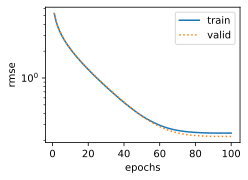

In [18]:
k, num_epochs, lr = 5, 100, 5 
weight_decay, batch_size = 0, 64
train_l, valid_l = k_fold(k, train_features, 
                          train_labels, num_epochs,
                         lr, weight_decay, 
                          batch_size)
print(('%d-fold validation: avg train rmse %f' + 
     'avg valid rmse %f') % (k, train_l, valid_l))

In [27]:
def train_and_pred(train_features, test_features,
                   train_labels, test_data, 
                   num_epochs, lr, weight_decay,
                   batch_size):
    net = get_net(train_features.shape[1])
    train_ls, _ = train(net, train_features, 
                        train_labels, None, None, 
                       num_epochs, lr, weight_decay,
                       batch_size)
    d2l.semilogy(range(1, num_epochs + 1), train_ls,
                'epochs', 'rmse')
    print('train rmse %f' % train_ls[-1])
    preds = net(test_features).detach().numpy()
    test_data['SalePrice'] = pd.Series(
        preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'],
                           test_data['SalePrice']],
                          axis=1)
    submission.to_csv(submission_data_path, 
                      index=False)

train rmse 0.229692


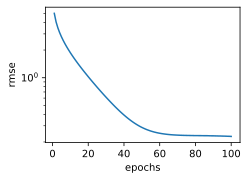

In [28]:
train_and_pred(train_features, test_features, 
              train_labels, test_data, num_epochs,
              lr, weight_decay, batch_size)